In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt




# Cargar archivo CSV (ajusta el nombre si es necesario)
df = pd.read_csv('/content/beneficiarios.csv', sep=';', encoding='utf-8')

# Ver primeras filas
df.head()

# Revisar columnas y tipos
df.info()

# --- LIMPIEZA Y PREPROCESAMIENTO ---

# Eliminar filas con datos faltantes
df = df.dropna(subset=['EDAD', 'PLATAFORMA_EDUCATIVA'])

# Asegurar que la edad sea tipo entero
df['EDAD'] = df['EDAD'].astype(int)

# Crear grupos etarios con etiquetas personalizadas
bins = [0, 12, 18, 26, 40, 60, 100]
labels = ['Niñez\n(0-12)', 'Adolescencia\n(13-18)', 'Juventud\n(19-26)',
          'Adultez joven\n(27-40)', 'Adultez media\n(41-60)', 'Adulto mayor\n(60+)']
df['GRUPO_ETARIO'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4895 entries, 0 to 4894
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   DEPARTAMENTO          4895 non-null   object
 1   MUNICIPIO             4895 non-null   object
 2   GENERO                4895 non-null   object
 3   EDAD                  4895 non-null   int64 
 4   PLATAFORMA_EDUCATIVA  4895 non-null   object
dtypes: int64(1), object(4)
memory usage: 191.3+ KB


In [5]:
# --- CODIFICACIÓN PARA ANÁLISIS ---

# Codificación One-Hot de grupo etario y plataforma
df_encoded = pd.get_dummies(df[['GRUPO_ETARIO', 'PLATAFORMA_EDUCATIVA']], drop_first=False)

# Agregar edad al nuevo DataFrame codificado
df_encoded['EDAD'] = df['EDAD']


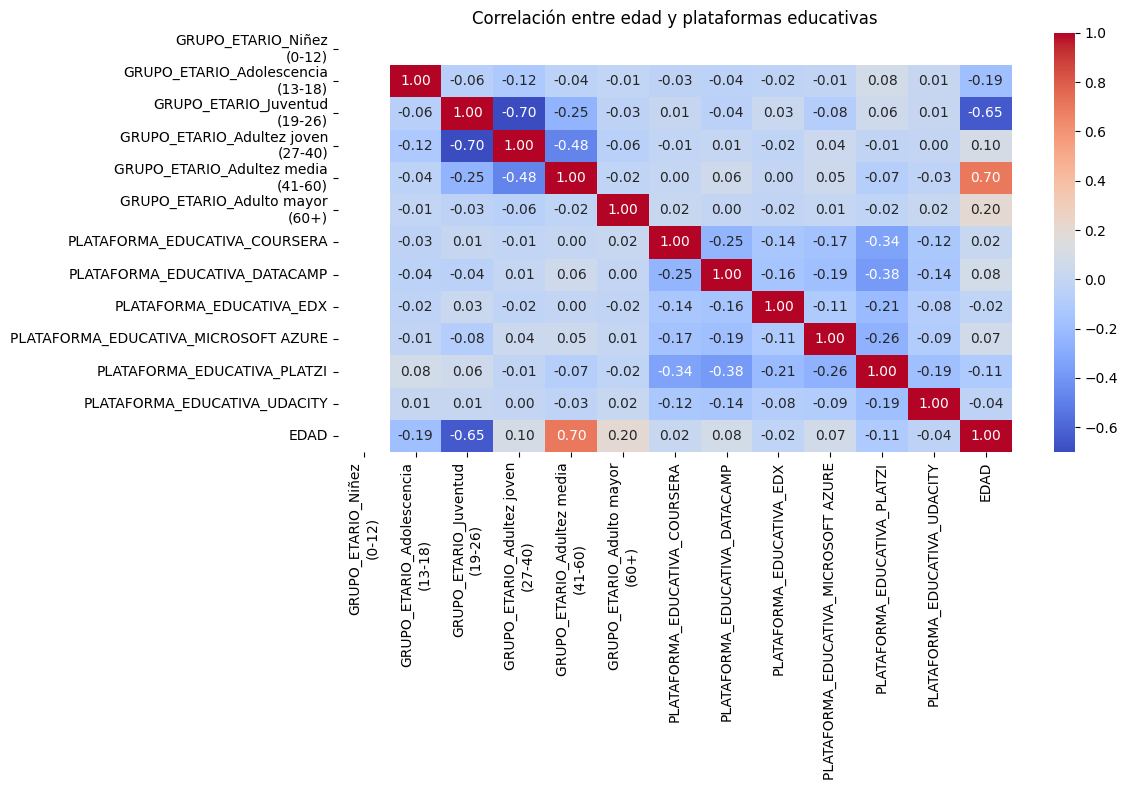

In [6]:
# --- MATRIZ DE CORRELACIÓN ---

corr_matrix = df_encoded.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlación entre edad y plataformas educativas')
plt.tight_layout()
plt.show()

/tmp/ipython-input-15-65831988.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conteo = df.groupby(['GRUPO_ETARIO', 'PLATAFORMA_EDUCATIVA']).size().unstack(fill_value=0)
/tmp/ipython-input-15-65831988.py:43: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


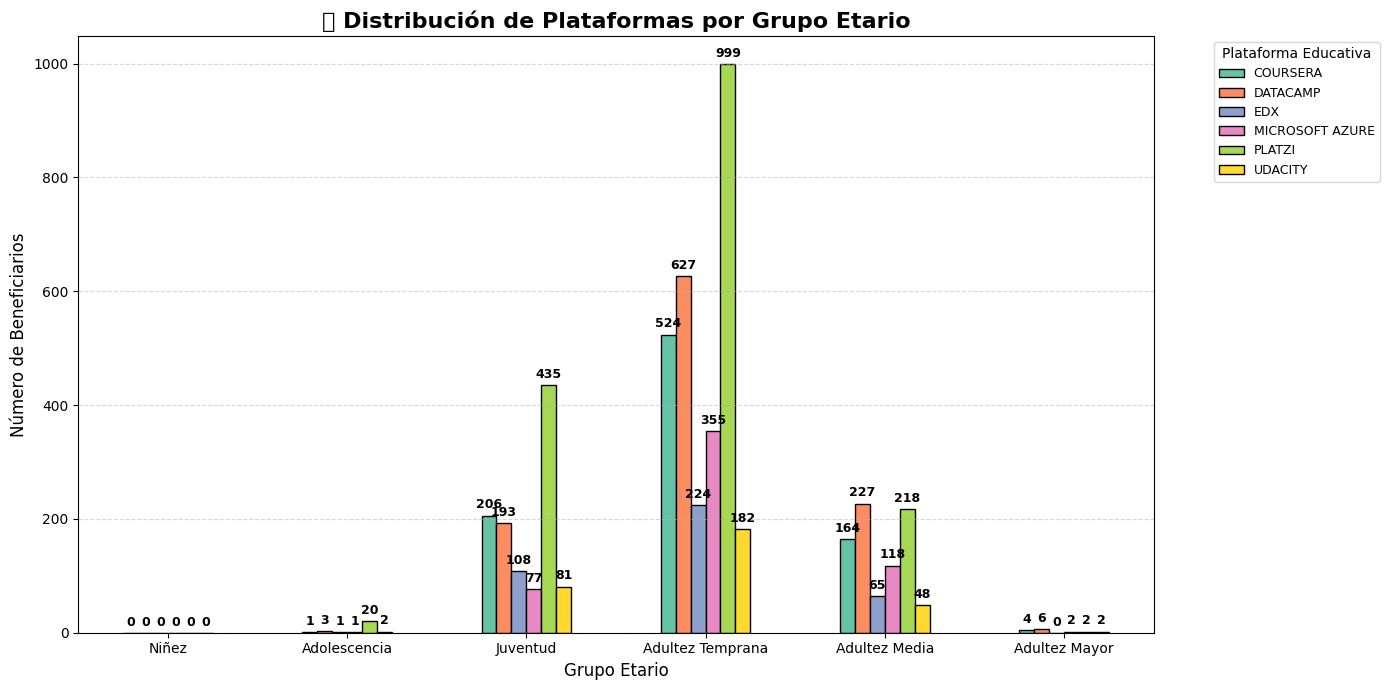

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza y preparación
df = df.dropna(subset=['EDAD', 'PLATAFORMA_EDUCATIVA'])
df['EDAD'] = df['EDAD'].astype(int)
df['PLATAFORMA_EDUCATIVA'] = df['PLATAFORMA_EDUCATIVA'].str.strip()

# Grupos etarios
bins = [0, 12, 18, 26, 40, 60, 100]
labels = ['Niñez', 'Adolescencia', 'Juventud', 'Adultez Temprana', 'Adultez Media', 'Adultez Mayor']
df['GRUPO_ETARIO'] = pd.cut(df['EDAD'], bins=bins, labels=labels, right=False)

# Conteo de combinaciones
conteo = df.groupby(['GRUPO_ETARIO', 'PLATAFORMA_EDUCATIVA']).size().unstack(fill_value=0)

# Paleta personalizada
custom_palette = sns.color_palette("Set2", n_colors=conteo.columns.shape[0])

# Crear gráfico
ax = conteo.plot(kind='bar', stacked=False, figsize=(14, 7), color=custom_palette, edgecolor='black')

# Agregar etiquetas de valor con negrilla y color negro
for bars in ax.containers:
    ax.bar_label(
        bars,
        label_type='edge',
        fontsize=9,
        padding=3,
        color='black',
        weight='bold'
    )

# Estética
plt.title('🎓 Distribución de Plataformas por Grupo Etario', fontsize=16, fontweight='bold')
plt.ylabel('Número de Beneficiarios', fontsize=12)
plt.xlabel('Grupo Etario', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Plataforma Educativa', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9, title_fontsize=10)
plt.tight_layout()
plt.show()
